# 다운샘플링

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample

In [15]:
df = pd.read_csv('./concat.csv', encoding='utf-8')

In [16]:
df

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
0,2011-03-04 17:00:00,2.8,8.9,0.3,0.5,1021.0,0.0
1,2011-03-04 18:00:00,3.4,8.9,0.3,0.4,1021.7,0.0
2,2011-03-04 19:00:00,4.5,8.9,0.3,0.4,1022.2,0.0
3,2011-03-04 20:00:00,2.9,8.9,0.3,0.5,1022.6,0.0
4,2011-03-04 21:00:00,3.8,8.9,0.3,0.5,1023.1,0.0
...,...,...,...,...,...,...,...
76354,2020-12-30 20:00:00,14.4,19.5,2.0,3.1,1018.9,1.0
76355,2020-12-30 21:00:00,13.0,20.6,2.0,3.5,1020.4,1.0
76356,2020-12-30 22:00:00,10.7,16.3,2.0,3.4,1021.3,1.0
76357,2020-12-30 23:00:00,13.9,20.4,2.3,3.8,1021.5,1.0


0.0    69488
1.0     6871
Name: 특보강도, dtype: int64


<AxesSubplot: ylabel='Type'>

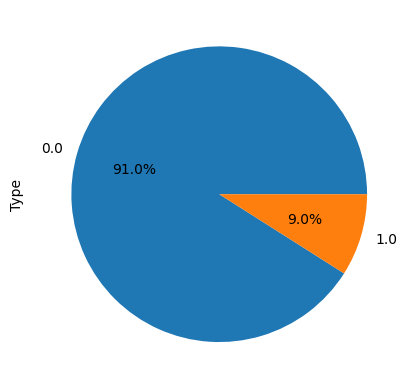

In [17]:
print(df["특보강도"].value_counts())

df.groupby('특보강도').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [18]:
df_zero = df[df["특보강도"] == 0]
df_one = df[df["특보강도"] == 1]
print(df_zero.shape)
print(df_one.shape)

(69488, 7)
(6871, 7)


* down sampling

In [19]:
zero_downsample = resample(df_zero,
             replace=True,
             n_samples=len(df_one),
             random_state=42)

print(zero_downsample.shape)

(6871, 7)


In [20]:
zero_downsample

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
17951,2013-09-07 15:00:00,4.6,10.4,0.5,0.8,1015.7,0.0
945,2011-04-13 05:00:00,5.2,7.7,0.2,0.4,1016.1,0.0
60491,2019-01-29 01:00:00,9.8,13.2,1.1,1.8,1023.6,0.0
7165,2012-06-08 05:00:00,2.9,8.3,0.1,0.2,1005.3,0.0
41259,2016-07-11 16:00:00,1.9,6.7,0.1,0.2,1004.1,0.0
...,...,...,...,...,...,...,...
23626,2014-05-08 11:00:00,7.7,18.9,0.6,0.9,1008.9,0.0
31363,2015-04-09 22:00:00,4.1,11.4,0.3,0.5,1024.2,0.0
68669,2020-01-14 06:00:00,11.3,13.5,1.0,1.4,1021.7,0.0
54366,2018-02-11 11:00:00,6.0,17.2,0.1,0.2,1023.4,0.0


* plot

0.0    6871
1.0    6871
Name: 특보강도, dtype: int64


<AxesSubplot: ylabel='Type'>

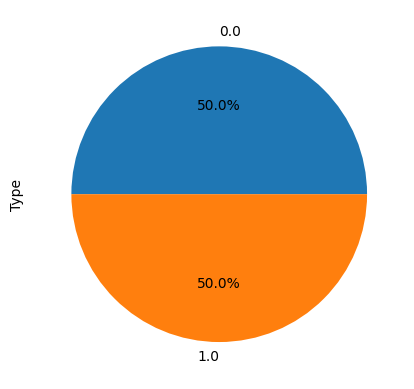

In [21]:
data_downsampled = pd.concat([zero_downsample, df_one])

print(data_downsampled["특보강도"].value_counts())

data_downsampled.groupby('특보강도').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [8]:
data_downsampled

,일시,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
17951,2013-09-07 15:00:00,4.6,10.4,0.5,0.8,1015.7,0.0
945,2011-04-13 05:00:00,5.2,7.7,0.2,0.4,1016.1,0.0
60491,2019-01-29 01:00:00,9.8,13.2,1.1,1.8,1023.6,0.0
7165,2012-06-08 05:00:00,2.9,8.3,0.1,0.2,1005.3,0.0
41259,2016-07-11 16:00:00,1.9,6.7,0.1,0.2,1004.1,0.0
...,...,...,...,...,...,...,...
76354,2020-12-30 20:00:00,14.4,19.5,2.0,3.1,1018.9,1.0
76355,2020-12-30 21:00:00,13.0,20.6,2.0,3.5,1020.4,1.0
76356,2020-12-30 22:00:00,10.7,16.3,2.0,3.4,1021.3,1.0
76357,2020-12-30 23:00:00,13.9,20.4,2.3,3.8,1021.5,1.0


In [22]:
# df[컬럼명].value_counts()
data_downsampled['특보강도'].value_counts()

0.0    6871
1.0    6871
Name: 특보강도, dtype: int64

In [23]:
# obj -> datetime
data_downsampled['일시'] = pd.to_datetime(data_downsampled['일시'])
data_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13742 entries, 17951 to 76358
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   일시          13742 non-null  datetime64[ns]
 1   WIND_SPEED  13742 non-null  float64       
 2   GUST_WIND   13742 non-null  float64       
 3   SIG_WAVE    13742 non-null  float64       
 4   MAX_WAVE    13742 non-null  float64       
 5   HPA         13742 non-null  float64       
 6   특보강도        13742 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 858.9 KB


In [24]:
# 인덱스
data_downsampled = data_downsampled.set_index('일시')
data_downsampled

,WIND_SPEED,GUST_WIND,SIG_WAVE,MAX_WAVE,HPA,특보강도
일시,,,,,,
2013-09-07 15:00:00,4.6,10.4,0.5,0.8,1015.7,0.0
2011-04-13 05:00:00,5.2,7.7,0.2,0.4,1016.1,0.0
2019-01-29 01:00:00,9.8,13.2,1.1,1.8,1023.6,0.0
2012-06-08 05:00:00,2.9,8.3,0.1,0.2,1005.3,0.0
2016-07-11 16:00:00,1.9,6.7,0.1,0.2,1004.1,0.0
...,...,...,...,...,...,...
2020-12-30 20:00:00,14.4,19.5,2.0,3.1,1018.9,1.0
2020-12-30 21:00:00,13.0,20.6,2.0,3.5,1020.4,1.0
2020-12-30 22:00:00,10.7,16.3,2.0,3.4,1021.3,1.0


In [25]:
data_downsampled.to_csv('down_sampling.csv')

## 종합 코드

In [ ]:
# 라이브러리 로드
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.utils import resample

# 데이터 로딩
df = pd.read_csv('./concat.csv', encoding='utf-8')

# 데이터셋 나누기
df_zero = df[df["특보강도"] == 0]
df_one = df[df["특보강도"] == 1]
print(df_zero.shape)
print(df_one.shape)

# down sampling
zero_downsample = resample(df_zero,
             replace=True,
             n_samples=len(df_one),
             random_state=42)

print(zero_downsample.shape)

# plot
data_downsampled = pd.concat([zero_downsample, df_one])

print(data_downsampled["특보강도"].value_counts())

data_downsampled.groupby('특보강도').size().plot(kind='pie',
                                       y = "v1",
                                       label = "Type",
                                       autopct='%1.1f%%')
                                       
# df[컬럼명].value_counts()
data_downsampled['특보강도'].value_counts()

# obj -> datetime
data_downsampled['일시'] = pd.to_datetime(data_downsampled['일시'])
data_downsampled.info()

# 인덱스
data_downsampled = data_downsampled.set_index('일시')
data_downsampled

#저장
data_downsampled.to_csv('down_sampling.csv')

